In [19]:
from neural_image_region_growing import NeuralImageRegionGrowing
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

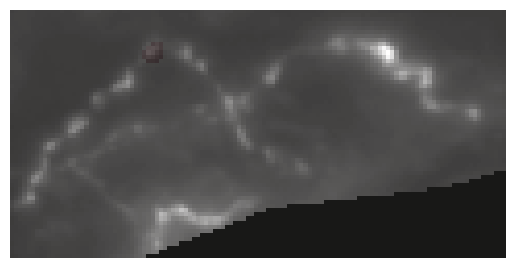

In [20]:
input_image_path = "/Users/ponywen/projects/ienf_q/pre_processing/Centered/processed_S163-2_a.tif"

input_image = np.array(Image.open(input_image_path).convert("RGB"))
label_image = np.array(Image.open(input_image_path.replace(".tif", "_label.tif")).convert("L"))
mask_image = np.array(Image.open(input_image_path.replace(".tif", "_mask.tif")).convert("L"))

input_image_clipped = input_image[805:865,865:985, 1]
label_image_clipped = label_image[805:865,865:985]
mask_image_clipped = mask_image[805:865,865:985]

plt.imshow(input_image_clipped, cmap='gray')
plt.imshow(label_image_clipped, alpha=0.1, cmap='Reds')

plt.axis('off')
plt.show()

In [21]:
# 計算亮點數量
num_bright_spots = np.sum(label_image_clipped > 0)
print(f"亮點數量: {num_bright_spots}")

亮點數量: 20


亮點數量: 20
亮點最小強度: 94
亮點最大強度: 94
亮點平均強度: 94.0


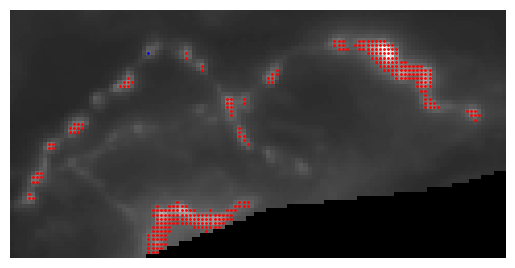

In [22]:
# 依照原始像素亮度進行排序，取前 N 個亮點
bright_spot_indices = np.argwhere(label_image_clipped > 0)
bright_spot_values = input_image_clipped[bright_spot_indices[:,0], bright_spot_indices[:,1]]

sorted_indices = np.argsort(-bright_spot_values)  # 負號表示降序
# 計算亮點數量
num_bright_spots = np.sum(label_image_clipped > 0)
print(f"亮點數量: {num_bright_spots}")

N = int(num_bright_spots * 0.05)  # 取前 N 個亮點

top_n_indices = bright_spot_indices[sorted_indices[:N]]

filtered_label = np.zeros_like(label_image_clipped)
filtered_label[top_n_indices[:, 0], top_n_indices[:, 1]] = 255

mean_intensity = np.mean(input_image_clipped[filtered_label > 0])
min_intensity = np.min(input_image_clipped[filtered_label > 0])
max_intensity = np.max(input_image_clipped[filtered_label > 0])
print(f"亮點最小強度: {min_intensity}")
print(f"亮點最大強度: {max_intensity}")
print(f"亮點平均強度: {mean_intensity}")



# 標記出所有大於亮點平均亮度的點
highlighted_points = np.argwhere(input_image_clipped > min_intensity + (mean_intensity - min_intensity) * 0.5)
for point in highlighted_points:
    plt.plot(point[1], point[0], 'ro', markersize=1)


filtered_label[highlighted_points[:, 0], highlighted_points[:, 1]] = 255
for idx in top_n_indices:
	y, x = idx
	plt.plot(x, y, 'bo', markersize=1)  # 在圖上標記亮點
	# 在這裡可以添加其他標記或註釋
plt.imshow(input_image_clipped, cmap='gray')
plt.axis('off')
plt.show()

In [23]:
Image.fromarray(input_image_clipped).save("test.tif")
Image.fromarray(filtered_label).save("test_label.tif")
Image.fromarray(mask_image_clipped).save("test_mask.tif")



Processing: test
Successfully loaded: test
  Image shape: (60, 120)
  Bright spots: 312 pixels
Bright spot characteristics:
  Count: 312
  Intensity: 119.4 ± 26.0
  Separation from background: 73.5
Extracted 16 seed regions
Applied Gaussian blur to original image
Performing 8-connected region growing...

Performance Results:
  Precision: 0.947
  Recall:    0.686
  F1-Score:  0.796
Visualization saved to: test_region_growing_analysis.png


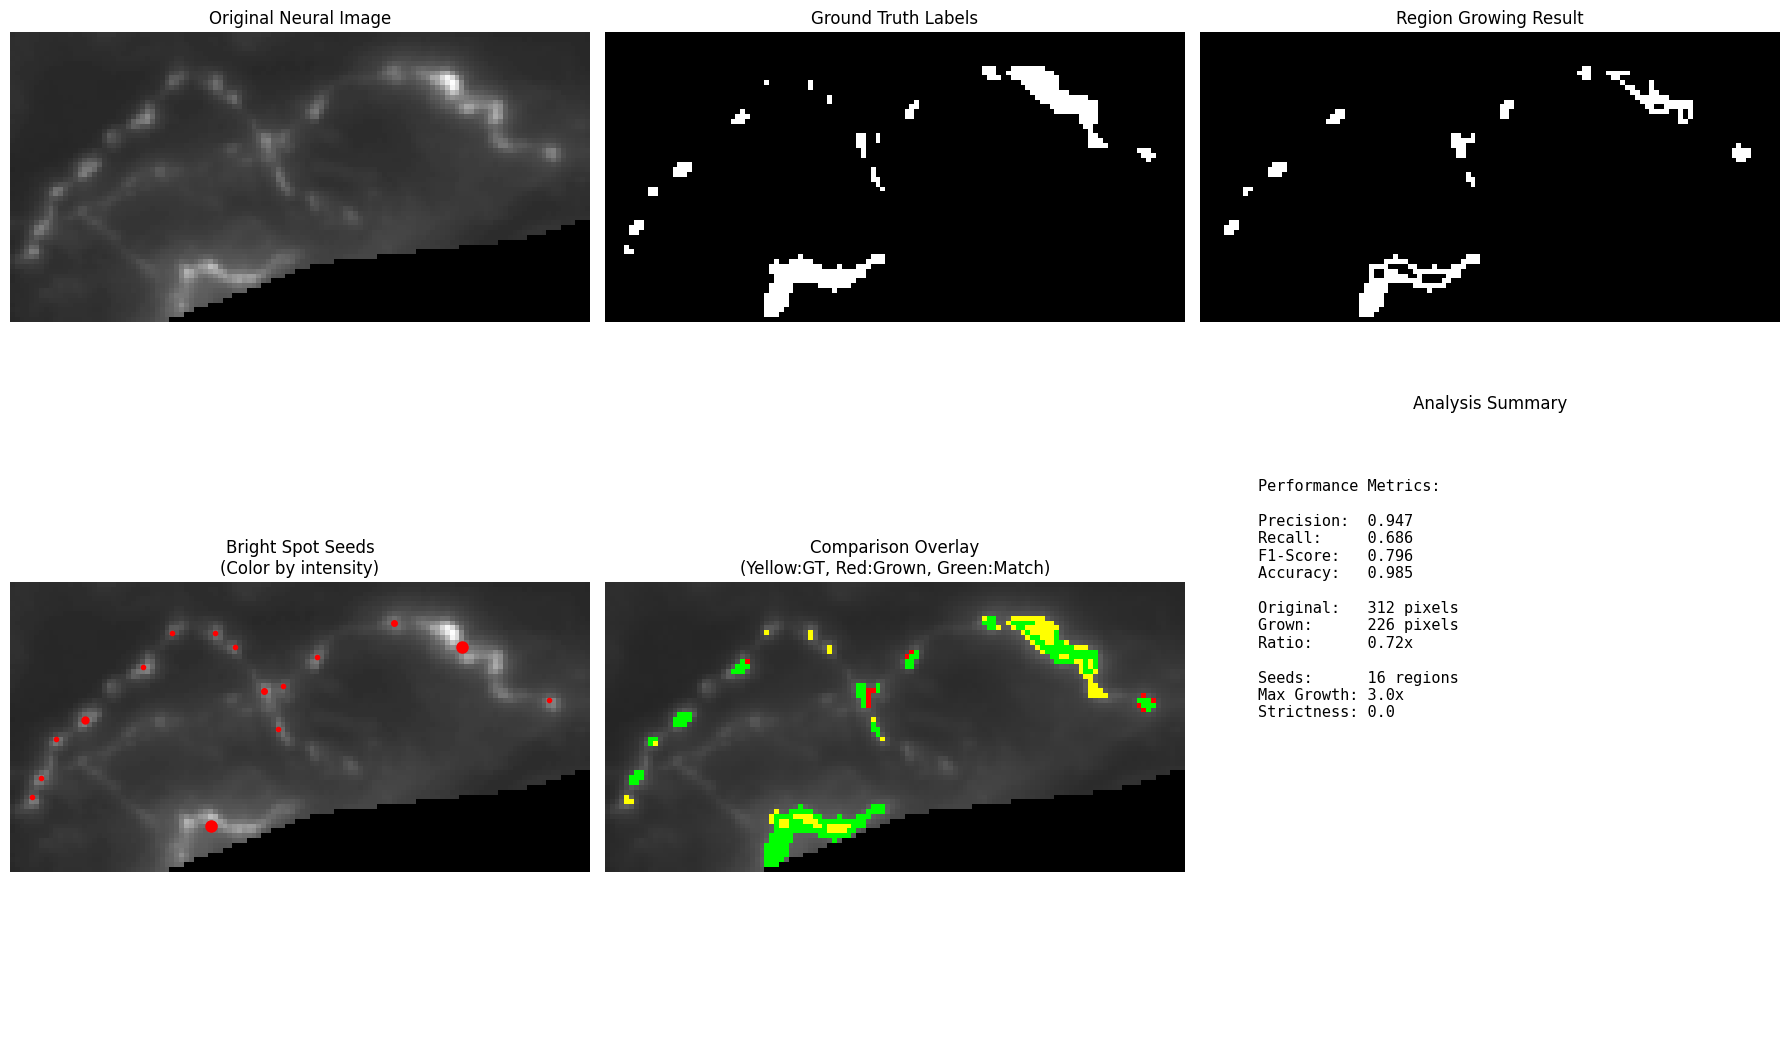

Results saved: test_grown_result.tif


In [24]:
region_grower = NeuralImageRegionGrowing(
   strictness=0.0,      # 較高的嚴格度
        max_growth_ratio=3.0,  # 限制生長倍數
        min_component_size=3   # 過濾小區域
)

result = region_grower.process_single_image("test", save_results=True)